### 2T - ASSOCIATION RULES

Dataset: https://www.kaggle.com/datasets/acostasg/random-shopping-cart

Maestrante: Daniel Patricio Olivera Flores
 
 Contenido del Dataframe:

 * fecha, año, mes, dia
 * n, cantidad de objetos comprados
 * item, nombre del producto comprado

In [38]:
#LIBRERIAS

import pandas as pd
import numpy as np
import zipfile
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# FUNCION, DESCOMPRIME Y CARGA CSV

def descomprimir_y_cargar_csv(archivo_zip, directorio_destino='.'):
    dataframes = {}

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        zip_ref.extractall(directorio_destino)

        for nombre_archivo in zip_ref.namelist():
            if nombre_archivo.endswith('.csv'):
                nombre_variable = os.path.splitext(os.path.basename(nombre_archivo))[0]
                ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
                dataframes[nombre_variable] = pd.read_csv(ruta_archivo)
    
    return dataframes

In [40]:
#DICCIONARIO DE DATAFRAMES

archivo_zip = 'group.zip'
dataframes = descomprimir_y_cargar_csv(archivo_zip)
print(dataframes.keys())

dict_keys(['dataset_group'])


### EDA

In [41]:
df_train= dataframes['dataset_group']
print("El dataset train tiene: {} filas y {} columnas".format(df_train.shape[0], df_train.shape[1]))
df_head_train = df_train.head()
df_describe_train = df_train.describe()
print(df_head_train, "\n")
print(df_describe_train)

El dataset train tiene: 22342 filas y 3 columnas
   2000-01-01  1         yogurt
0  2000-01-01  1           pork
1  2000-01-01  1  sandwich bags
2  2000-01-01  1     lunch meat
3  2000-01-01  1   all- purpose
4  2000-01-01  1          flour 

                  1
count  22342.000000
mean     576.438367
std      328.434706
min        1.000000
25%      292.000000
50%      582.000000
75%      863.000000
max     1139.000000


In [16]:
#PONIENDO NOMBRE A LAS COLUMNAS

df_train.columns = ['fecha', 'n', 'item']
df_train.head(20)

,fecha,n,item
0,2000-01-01,1,pork
1,2000-01-01,1,sandwich bags
2,2000-01-01,1,lunch meat
3,2000-01-01,1,all- purpose
4,2000-01-01,1,flour
5,2000-01-01,1,soda
6,2000-01-01,1,butter
7,2000-01-01,1,vegetables
8,2000-01-01,1,beef
9,2000-01-01,1,aluminum foil


In [18]:
#CROSSTAB DE FECHA E ITEM

transactionData = pd.crosstab(df_train['fecha'],df_train['item'])
transactionData.head(20)

item,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
fecha,,,,,,,,,,,,,,,,,,,,,
2000-01-01,3,2,0,1,1,1,1,0,2,1,...,3,1,1,0,0,1,1,4,2,1
2000-01-02,3,1,4,0,2,4,1,1,2,1,...,2,4,3,5,0,7,1,12,1,1
2000-01-03,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,2,1,2,0,1
2000-01-04,0,0,0,0,0,0,1,2,0,1,...,0,0,1,0,0,1,0,1,1,0
2000-01-05,0,0,4,2,0,0,2,3,1,5,...,1,2,4,0,2,2,2,5,2,0
2000-01-06,0,0,2,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,3,1,1
2000-01-07,1,3,2,0,1,2,2,0,1,0,...,3,2,0,1,3,2,1,3,0,0
2000-01-08,0,0,1,1,0,2,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
2000-01-09,0,1,1,2,1,0,0,2,0,0,...,0,0,0,1,1,0,0,1,1,0


In [19]:
transactionData.columns

Index(['all- purpose', 'aluminum foil', 'bagels', 'beef', 'butter', 'cereals',
       'cheeses', 'coffee/tea', 'dinner rolls', 'dishwashing liquid/detergent',
       'eggs', 'flour', 'fruits', 'hand soap', 'ice cream', 'individual meals',
       'juice', 'ketchup', 'laundry detergent', 'lunch meat', 'milk', 'mixes',
       'paper towels', 'pasta', 'pork', 'poultry', 'sandwich bags',
       'sandwich loaves', 'shampoo', 'soap', 'soda', 'spaghetti sauce',
       'sugar', 'toilet paper', 'tortillas', 'vegetables', 'waffles',
       'yogurt'],
      dtype='object', name='item')

In [21]:
list(df_train['item'].unique())

['pork',
 'sandwich bags',
 'lunch meat',
 'all- purpose',
 'flour',
 'soda',
 'butter',
 'vegetables',
 'beef',
 'aluminum foil',
 'dinner rolls',
 'shampoo',
 'mixes',
 'soap',
 'laundry detergent',
 'ice cream',
 'toilet paper',
 'hand soap',
 'waffles',
 'cheeses',
 'milk',
 'dishwashing liquid/detergent',
 'individual meals',
 'yogurt',
 'cereals',
 'tortillas',
 'spaghetti sauce',
 'ketchup',
 'sandwich loaves',
 'poultry',
 'bagels',
 'eggs',
 'juice',
 'pasta',
 'paper towels',
 'coffee/tea',
 'fruits',
 'sugar']

In [23]:
most_frequent_product = df_train['item'].value_counts().idxmax()
print("El producto más frecuente es:", most_frequent_product)

El producto más frecuente es: vegetables


In [30]:
#FUNCION PARA CONTAR PRODUCTOS

def count_products(df):
    product_counts = df.groupby('item')['n'].sum()
    product_counts = product_counts.sort_values(ascending=False)
    return product_counts

product_counts = count_products(df_train)
print(product_counts)

df_train.isna().sum()

item
vegetables                      989854
poultry                         377276
soda                            357468
dinner rolls                    337572
ice cream                       337119
cheeses                         336333
soap                            334525
lunch meat                      331510
cereals                         330756
yogurt                          330360
paper towels                    329368
eggs                            328025
toilet paper                    325931
bagels                          325357
waffles                         325222
juice                           323631
coffee/tea                      323377
aluminum foil                   322770
tortillas                       322582
milk                            322419
butter                          322283
dishwashing liquid/detergent    322248
all- purpose                    322060
laundry detergent               317200
beef                            316623
pork                

fecha    0
n        0
item     0
dtype: int64

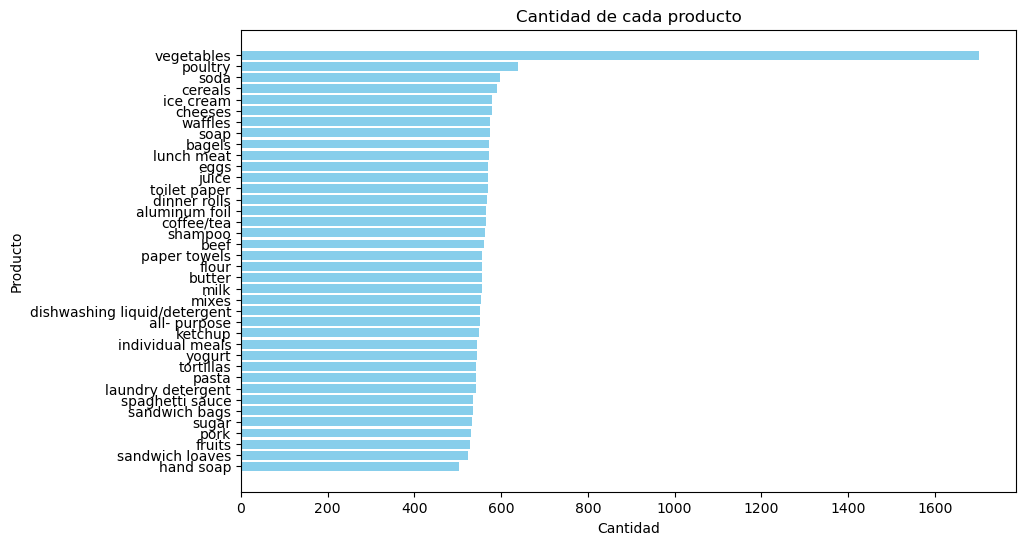

In [28]:
#FUNCION PARA CONTAR Y GRAFICAR PRODUCTOS

def count_and_plot(df):
    product_counts = df['item'].value_counts().sort_values(ascending=True)

    plt.figure(figsize=(10,6))
    plt.barh(product_counts.index, product_counts.values, color='skyblue')
    plt.xlabel('Cantidad')
    plt.ylabel('Producto')
    plt.title('Cantidad de cada producto')
    plt.show()
    
count_and_plot(df_train)

In [34]:
#ENCODING

def encode_units(df):
    return df.applymap(lambda x: np.where(x >= 1, 1, 0))

trans_sets = encode_units(transactionData)
trans_sets.head(20)

item,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
fecha,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1,1,0,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1
2000-01-02,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
2000-01-03,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,1,1,0,1
2000-01-04,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,1,0,1,1,0
2000-01-05,0,0,1,1,0,0,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
2000-01-06,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,1
2000-01-07,1,1,1,0,1,1,1,0,1,0,...,1,1,0,1,1,1,1,1,0,0
2000-01-08,0,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
2000-01-09,0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0


In [36]:
#APRIORI

frequent_itemsets = apriori(trans_sets, min_support = 0.2, use_colnames = True)
frequent_itemsets=frequent_itemsets.sort_values(by="support", ascending = False)
frequent_itemsets

c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
35,0.834163,(vegetables)
25,0.572139,(poultry)
14,0.568823,(ice cream)
6,0.562189,(cheeses)
36,0.560531,(waffles)
...,...,...
9723,0.200663,"(ice cream, aluminum foil, soap, lunch meat)"
9722,0.200663,"(ice cream, aluminum foil, poultry, lunch meat)"
9718,0.200663,"(ice cream, aluminum foil, juice, spaghetti sa..."
9715,0.200663,"(ice cream, aluminum foil, juice, lunch meat)"


In [37]:
#REGLAS DE ASOCIACION

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(vegetables),(poultry),0.834163,0.572139,0.505804,0.606362,1.059815,0.028547,1.086939
1,(poultry),(vegetables),0.572139,0.834163,0.505804,0.884058,1.059815,0.028547,1.430348
2,(vegetables),(lunch meat),0.834163,0.555556,0.502488,0.602386,1.084294,0.039064,1.117778
3,(lunch meat),(vegetables),0.555556,0.834163,0.502488,0.904478,1.084294,0.039064,1.736111
4,(vegetables),(waffles),0.834163,0.560531,0.499171,0.598410,1.067577,0.031597,1.094322
...,...,...,...,...,...,...,...,...,...
155221,(soda),"(vegetables, soap, toilet paper, waffles)",0.552239,0.248756,0.200663,0.363363,1.460721,0.063291,1.180020
155222,(vegetables),"(waffles, soap, toilet paper, soda)",0.834163,0.207297,0.200663,0.240557,1.160445,0.027744,1.043795
155223,(toilet paper),"(vegetables, soap, soda, waffles)",0.540630,0.245439,0.200663,0.371166,1.512249,0.067971,1.199935
155224,(waffles),"(vegetables, soap, toilet paper, soda)",0.560531,0.252073,0.200663,0.357988,1.420177,0.059369,1.164974
